In [186]:
import pandas as pd

In [187]:
coach_df = pd.read_csv("./csv/coach_data_prepared_for_ml.csv", sep="\t", encoding="utf-8")

In [188]:
coach_df

,Race,Opponent Race,Rank Difference,Seat,Result
0,Necromantic Horror,Slann,-6.15,1,0
1,Nurgle,Underworld Denizens,14.21,1,0
2,Ogre,Necromantic Horror,42.54,0,0
3,Necromantic Horror,Wood Elf,-53.13,0,0
4,Amazon,Tomb Kings,-10.33,1,1
...,...,...,...,...,...
117849,Old World Alliance,Tomb Kings,10.00,1,0
117850,Tomb Kings,Old World Alliance,-10.00,0,1
117851,Imperial Nobility,Skaven,83.68,1,0
117852,Goblin,Orc,-15.77,0,1


#Model using rank difference only

array([[<Axes: title={'center': 'Rank Difference'}>,
        <Axes: title={'center': 'Result'}>]], dtype=object)

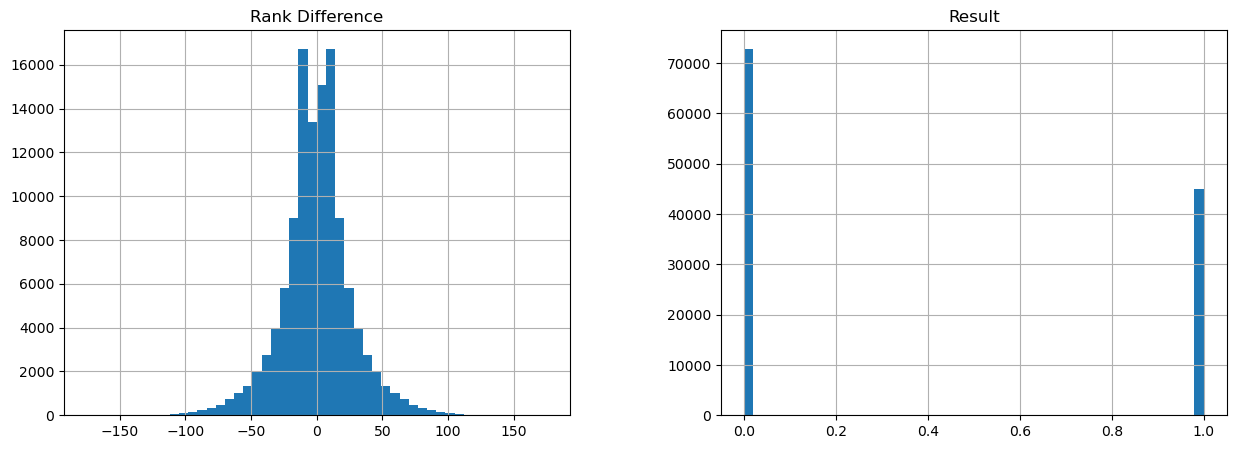

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt

rank_df = coach_df[["Rank Difference", "Result"]]
rank_df.hist(bins=50, figsize=(15,5))

In [190]:
# randomly split test/train sets

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(rank_df, test_size=0.2, random_state=5)


x_train = train_set[["Rank Difference"]]
y_train = train_set["Result"]


x_test = test_set[["Rank Difference"]]
y_test = test_set["Result"]


print(len(train_set), "train +", len(test_set), "test")

94283 train + 23571 test


In [191]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


model.fit(x_train, y_train)

LogisticRegression()

In [192]:
predictions = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.7644563234483052


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [194]:
cm = metrics.confusion_matrix(y_test, predictions)

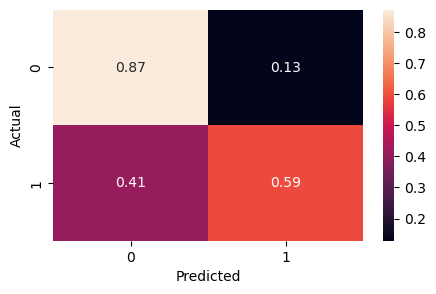

In [195]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Model using race

In [196]:
race_df = coach_df[["Race", "Opponent Race", "Result"]].copy()

In [197]:
train_set, test_set = train_test_split(race_df, test_size=0.2)

x_train = train_set[["Race", "Opponent Race"]]
y_train = train_set["Result"]

x_test = test_set[["Race", "Opponent Race"]]
y_test = test_set["Result"]


print(len(train_set), "train +", len(test_set), "test")

94283 train + 23571 test


In [198]:
from sklearn.preprocessing import OneHotEncoder

labels = list(set(x_train["Race"]) | set(x_train["Opponent Race"]) | set(x_test["Race"]) | set(x_test["Opponent Race"]))

cat_encoder = OneHotEncoder(sparse=False, categories = [labels, labels]) # for a dense array
x_train = cat_encoder.fit_transform(x_train)
x_test = cat_encoder.fit_transform(x_test)

In [199]:
model2 = LogisticRegression()


model2.fit(x_train, y_train)

LogisticRegression()

In [200]:
predictions = model2.predict(x_test)
score = model2.score(x_test, y_test)
print(score)

0.6171991005897077


In [201]:
cm = metrics.confusion_matrix(y_test, predictions)

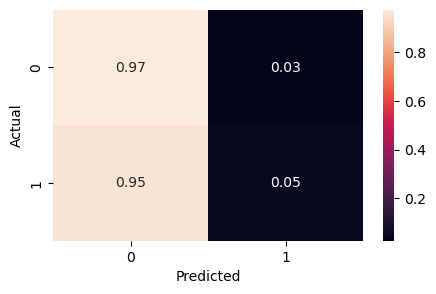

In [202]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)